<a href="https://colab.research.google.com/github/Anujaghotekar/Mobile-Price-Range-Prediction/blob/main/Indivisual_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    :- Mobile Price Range Prediction.

##### **Project Type**    :- Classification.
##### **Contribution**    :- Team(Data Pirates)
##### **Team Member 1 :-Tabassum Patel (Team Leader)**
##### **Team Member 2 :-Shubham Kodape**
##### **Team Member 3 :-Asma Patel**
##### **Team Member 4 :-anuja Ghotekar**
##### **Team Member 5 :-Pratiksha Auti**

# **Project Summary :-**

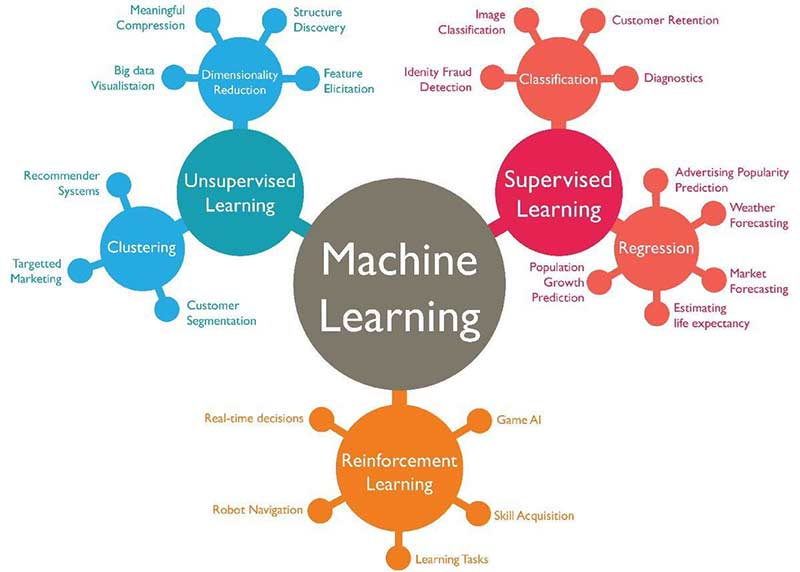

Now a days, a cellphone is an essential accessory of a person. It is the fastest evolving and moving product in the technology market space. New mobiles with updated versions and new features are introduced into the market at a rapid pace. Thousands of mobiles are sold each day. In such a fast-paced and volatile market, a mobile company needs to set optimal prices to complete with its rivals.This kind of prediction will help companies estimate price of mobiles to give tough competion to other mobile manufacturer.Also it will be usefull for Consumers to verify that they are paying best price for a mobile.

In this project, we are going to explore and analyze a dataset which contains specifications of two thousand mobile phones and try to predict optimum price ranges for a list of mobile phones in the market.During the purchase of mobile phones, various features like memory, display, battery, camera, etc., are considered. People fail to make correct decisions, due to the non-availability of necessary resources to cross-validate the price. To address this issue, a machine learning model is developed using the data related to the key features of the mobile phone. The developed model is then used to predict the price range of the new mobile phone.use the machine learning algorithms namely Support Vector Machine (SVM), Random Forest Classifier (RFC), Logistic Regression,Decission Tree,Naive Bayes Theorm,K-nearest neighbors are used to train the model and predict the output as low, medium, high or very high of price range.

# **GitHub Link :-**

https://github.com/Anujaghotekar

# **Problem Statement :-**

In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phoneleg - RAM Internal Memory, etc) and its selling price in this problem, we do not have to predict the actual price but a price range indicating how high the price is ?

AIM :- In this Project,On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc we are predicting Price range of the mobile.

# ***Let's Begin ! :-***

## ***1. Know Your Data :-***

First of all, import all required libraries like pandas, matplotlib, etc. These libraries are used to load, preprocess and visualize the dataset.

Then load the training and testing dataset using the read_csv function of the pandas module and store into the separate variable train and test

### Import Libraries :-

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import warnings
warnings.filterwarnings('ignore')


In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading :-



In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df1 = pd.read_csv('/content/data_mobile_price_range.csv',encoding='unicode_escape')

## **Dataset First View :-**

In [4]:
# Dataset First Look
df1.head().T

0       1       2       3       4
battery_power   842.0  1021.0   563.0   615.0  1821.0
blue              0.0     1.0     1.0     1.0     1.0
clock_speed       2.2     0.5     0.5     2.5     1.2
dual_sim          0.0     1.0     1.0     0.0     0.0
fc                1.0     0.0     2.0     0.0    13.0
four_g            0.0     1.0     1.0     0.0     1.0
int_memory        7.0    53.0    41.0    10.0    44.0
m_dep             0.6     0.7     0.9     0.8     0.6
mobile_wt       188.0   136.0   145.0   131.0   141.0
n_cores           2.0     3.0     5.0     6.0     2.0
pc                2.0     6.0     6.0     9.0    14.0
px_height        20.0   905.0  1263.0  1216.0  1208.0
px_width        756.0  1988.0  1716.0  1786.0  1212.0
ram            2549.0  2631.0  2603.0  2769.0  1411.0
sc_h              9.0    17.0    11.0    16.0     8.0
sc_w              7.0     3.0     2.0     8.0     2.0
talk_time        19.0     7.0     9.0    11.0    15.0
three_g           0.0     1.0     1.0     1.0     1.0
touch_screen      0.0     1.0     1.0     0.0     1.0
wifi              1.0     0.0     0.0     0.0     0.0
price_range       1.0     2.0     2.0     2.0     1.0

### Dataset Rows & Columns count :-

In [5]:
# Dataset Rows & Columns count
df1.shape

(2000, 21)

### Dataset Information :-

In [6]:
# Dataset Info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values :-

In [7]:
# Dataset Duplicate Value Count
len(df1[df1.duplicated()])

0

#### Missing Values/Null Values :-

In [8]:
# Missing Values/Null Values Count
print(df1.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


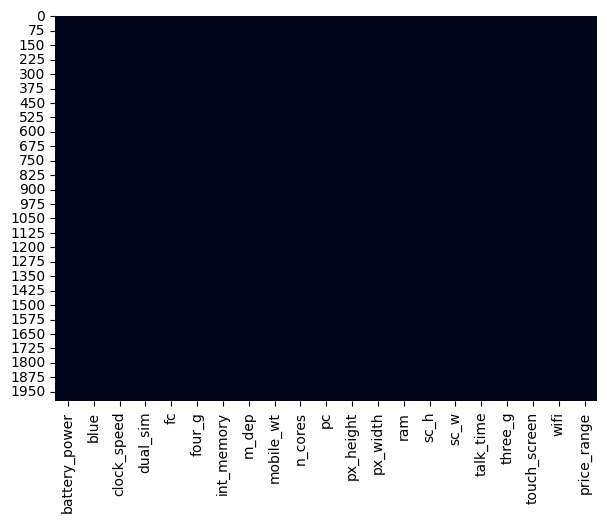

In [9]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df1.isnull(), cbar=False)
plt.show()

## What did you know about your dataset?
answer :- 1.The given dataset from competitive mobile market companies, and we do not have to predict the actual price but a price range indicating how high the price is.

2.Mobile phones come in all sorts of prices, features, specifications and all. Price estimation and prediction is an important part of consumer strategy. Deciding on the correct price of a product is very important for the market success of a product. A new product that has to be launched, must have the correct price so that consumers find it appropriate to buy the product.

3.The above dataset has 2000 rows and 21 columns. There are no mising values and duplicate values in the dataset

## ***2. Understanding Your Variables :-***

In [10]:
# Dataset Columns
df1.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [11]:
# Dataset Describe
df1.describe(include="all"). T

count        mean          std    min      25%     50%  \
battery_power  2000.0  1238.51850   439.418206  501.0   851.75  1226.0   
blue           2000.0     0.49500     0.500100    0.0     0.00     0.0   
clock_speed    2000.0     1.52225     0.816004    0.5     0.70     1.5   
dual_sim       2000.0     0.50950     0.500035    0.0     0.00     1.0   
fc             2000.0     4.30950     4.341444    0.0     1.00     3.0   
four_g         2000.0     0.52150     0.499662    0.0     0.00     1.0   
int_memory     2000.0    32.04650    18.145715    2.0    16.00    32.0   
m_dep          2000.0     0.50175     0.288416    0.1     0.20     0.5   
mobile_wt      2000.0   140.24900    35.399655   80.0   109.00   141.0   
n_cores        2000.0     4.52050     2.287837    1.0     3.00     4.0   
pc             2000.0     9.91650     6.064315    0.0     5.00    10.0   
px_height      2000.0   645.10800   443.780811    0.0   282.75   564.0   
px_width       2000.0  1251.51550   432.199447  500.0   874.75  1247.0   
ram            2000.0  2124.21300  1084.732044  256.0  1207.50  2146.5   
sc_h           2000.0    12.30650     4.213245    5.0     9.00    12.0   
sc_w           2000.0     5.76700     4.356398    0.0     2.00     5.0   
talk_time      2000.0    11.01100     5.463955    2.0     6.00    11.0   
three_g        2000.0     0.76150     0.426273    0.0     1.00     1.0   
touch_screen   2000.0     0.50300     0.500116    0.0     0.00     1.0   
wifi           2000.0     0.50700     0.500076    0.0     0.00     1.0   
price_range    2000.0     1.50000     1.118314    0.0     0.75     1.5   

                   75%     max  
battery_power  1615.25  1998.0  
blue              1.00     1.0  
clock_speed       2.20     3.0  
dual_sim          1.00     1.0  
fc                7.00    19.0  
four_g            1.00     1.0  
int_memory       48.00    64.0  
m_dep             0.80     1.0  
mobile_wt       170.00   200.0  
n_cores           7.00     8.0  
pc               15.00    20.0  
px_height       947.25  1960.0  
px_width       1633.00  1998.0  
ram            3064.50  3998.0  
sc_h             16.00    19.0  
sc_w              9.00    18.0  
talk_time        16.00    20.0  
three_g           1.00     1.0  
touch_screen      1.00     1.0  
wifi              1.00     1.0  
price_range       2.25     3.0

In [12]:
# Total phone with sc_w = 0
print(len(df1[df1.sc_w==0]))

180


In [13]:
#Total phone with px_height=0
print(len(df1[df1.px_height==0])) 

2


In [14]:
#where ther is sc_W and px_height is zero ,assigning mean values
df1['sc_w'][df1[df1.sc_w == 0].index] = df1.sc_w.mean()
df1['px_height'][df1[df1.px_height == 0].index] = df1.px_height.mean()

In [15]:
#checking whether there is duplicates or not
len(df1[df1.duplicated()])

0

In [16]:
#checking whether there is duplicates or not
df1.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

There are no duplicate values.

In [17]:
# Checking whetter there is null value or not
df1.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There is no misssing values in dataset.


### Variables Description :-

*   Battery_power : Total energy a battery can store in one time measured in mAh

*   Blue : Has bluetooth or not
*   Clock_speed : speed at which microprocessor executes instructions
*   Dual_sim : Has dual sim support or not
*   Fc : Front Camera mega pixels
*   Four_g : Has 4G or not
*   Int_memory : Internal Memory in Gigabytes
*   M_dep : Mobile Depth in cm
*   Mobile_wt : Weight of mobile phone
*   N_cores : Number of cores of processor
*   Pc : Primary Camera mega pixels
*   Px_height : Pixel Resolution Height
*   Px_width : Pixel Resolution Width
*   Ram : Random Access Memory in Mega
*   Touch_screen : Has touch screen or not
*   Wifi : Has wifi or not
*   Sc_h : Screen Height of mobile in cm
*   Sc_w : Screen Width of mobile in cm
*   Talk_time : longest time that a single battery charge will last when you are
*   Three_g : Has 3G or not
*   Wifi : Has wifi or not
*   Price_range : This is the target variable with value of 0(low cost),      (medium cost),2(high cost) and 3(very high cost).

##Check Unique Values for each variable. :-

In [18]:
# Check unique value for each variable
for i in df1.columns.tolist():
  print( " No. of unique values in ",i,"is",df1[i].nunique(),".")

 No. of unique values in  battery_power is 1094 .
 No. of unique values in  blue is 2 .
 No. of unique values in  clock_speed is 26 .
 No. of unique values in  dual_sim is 2 .
 No. of unique values in  fc is 20 .
 No. of unique values in  four_g is 2 .
 No. of unique values in  int_memory is 63 .
 No. of unique values in  m_dep is 10 .
 No. of unique values in  mobile_wt is 121 .
 No. of unique values in  n_cores is 8 .
 No. of unique values in  pc is 21 .
 No. of unique values in  px_height is 1137 .
 No. of unique values in  px_width is 1109 .
 No. of unique values in  ram is 1562 .
 No. of unique values in  sc_h is 15 .
 No. of unique values in  sc_w is 19 .
 No. of unique values in  talk_time is 19 .
 No. of unique values in  three_g is 2 .
 No. of unique values in  touch_screen is 2 .
 No. of unique values in  wifi is 2 .
 No. of unique values in  price_range is 4 .


##  ***Data Wrangling :-***

### Data Wrangling Code :-

In [19]:
# Create a copy of given dataset and assinged it as df
df=df1.copy()

# Checking mobile belongs ti price range 0
print("No of mobile belongs to price_range 0 is :",len(df[df['price_range']==0]))

# Checking mobile belongs to price range 4
print("No of mobile belongs to price_range 4 is :",len(df[df['price_range']==4]))

# Checking mobile belongs to price range 2
print("No of mobile belongs to price_range 2 is :",len(df[df['price_range']==2]))

# Checking mobile belongs to price range 5
print("No of mobile belongs to price_range 5 is :",len(df[df['price_range']==5]))


No of mobile belongs to price_range 0 is : 500
No of mobile belongs to price_range 4 is : 0
No of mobile belongs to price_range 2 is : 500
No of mobile belongs to price_range 5 is : 0


In [20]:
# Show value counts
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [21]:
# Mobile phones groupby 4g support and not supports
df.groupby('four_g')['price_range'].value_counts().reset_index(name='Count').sort_values(['Count'],ascending=True)


four_g  price_range  Count
3       0            3    225
2       0            1    238
1       0            0    241
7       1            2    247
0       0            2    253
6       1            0    259
5       1            1    262
4       1            3    275

In [22]:
# Mobile phones groupby 3g support and not supports
df.groupby('three_g')['price_range'].value_counts().reset_index(name='Count').sort_values(['Count'],ascending=True)


three_g  price_range  Count
3        0            2    113
2        0            3    115
1        0            1    122
0        0            0    127
7        1            0    373
6        1            1    378
5        1            3    385
4        1            2    387

In [23]:
# Mobile phones groupby blue support and not supports
df.groupby('blue')['price_range'].value_counts().reset_index(name='Count').sort_values(['Count'],ascending=True)


blue  price_range  Count
3     0            3    241
6     1            0    243
7     1            2    243
5     1            1    245
2     0            1    255
0     0            0    257
1     0            2    257
4     1            3    259

In [24]:
# Mobile phones groupby dual sim support and not supports
df.groupby('dual_sim')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

dual_sim  price_range  Count
4         1            3    265
5         1            1    255
0         0            2    251
1         0            0    250
6         1            0    250
7         1            2    249
2         0            1    245
3         0            3    235

In [25]:
# Mobile phones groupby touch screen support and not supports
df.groupby('touch_screen')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

touch_screen  price_range  Count
0             0            2    265
4             1            0    262
5             1            1    261
1             0            3    252
6             1            3    248
2             0            1    239
3             0            0    238
7             1            2    235

In [26]:
# Pixels count
df['px_count'] = df['px_width']*df['px_height']

In [27]:
# Mobile phones groupby touch screen support and not supports
df.groupby('touch_screen')['price_range'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=True)

touch_screen  price_range  Count
7             1            2    235
3             0            0    238
2             0            1    239
6             1            3    248
1             0            3    252
5             1            1    261
4             1            0    262
0             0            2    265

In [28]:
# show price range with descreasing pixel count values
df.sort_values(["px_count"],ascending=True)[ ['price_range', 'px_count'] ].head(20)

price_range  px_count
801             0     926.0
1536            1    1320.0
1963            1    1887.0
73              3    2552.0
1991            3    2972.0
468             0    4758.0
1314            0    4986.0
1878            1    5404.0
786             3    7168.0
1146            2    7875.0
1305            1    8720.0
1597            0    9058.0
1318            3    9519.0
946             0    9752.0
1799            2   11220.0
726             2   11418.0
424             2   11802.0
849             0   11916.0
1714            2   13208.0
1166            0   14900.0

In [29]:
# Write your code to make your dataset analysis ready.
data_num = df1[['battery_power',  'clock_speed' , 'fc','int_memory','m_dep', 'mobile_wt','n_cores', 'pc',
                      'px_height','px_width','ram', 'sc_h', 'sc_w', 'talk_time']]

data_cat = df1[['blue','dual_sim', 'four_g','three_g','touch_screen', 'wifi']]

In [30]:
data_cat

blue  dual_sim  four_g  three_g  touch_screen  wifi
0        0         0       0        0             0     1
1        1         1       1        1             1     0
2        1         1       1        1             1     0
3        1         0       0        1             0     0
4        1         0       1        1             1     0
...    ...       ...     ...      ...           ...   ...
1995     1         1       1        1             1     0
1996     1         1       0        1             1     1
1997     0         1       1        1             1     0
1998     0         0       1        1             1     1
1999     1         1       1        1             1     1

[2000 rows x 6 columns]

In [31]:
data_num

battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  n_cores  \
0               842          2.2   1           7    0.6        188        2   
1              1021          0.5   0          53    0.7        136        3   
2               563          0.5   2          41    0.9        145        5   
3               615          2.5   0          10    0.8        131        6   
4              1821          1.2  13          44    0.6        141        2   
...             ...          ...  ..         ...    ...        ...      ...   
1995            794          0.5   0           2    0.8        106        6   
1996           1965          2.6   0          39    0.2        187        4   
1997           1911          0.9   1          36    0.7        108        8   
1998           1512          0.9   4          46    0.1        145        5   
1999            510          2.0   5          45    0.9        168        6   

      pc  px_height  px_width   ram  sc_h  sc_w  talk_time  
0      2       20.0       756  2549     9   7.0         19  
1      6      905.0      1988  2631    17   3.0          7  
2      6     1263.0      1716  2603    11   2.0          9  
3      9     1216.0      1786  2769    16   8.0         11  
4     14     1208.0      1212  1411     8   2.0         15  
...   ..        ...       ...   ...   ...   ...        ...  
1995  14     1222.0      1890   668    13   4.0         19  
1996   3      915.0      1965  2032    11  10.0         16  
1997   3      868.0      1632  3057     9   1.0          5  
1998   5      336.0       670   869    18  10.0         19  
1999  16      483.0       754  3919    19   4.0          2  

[2000 rows x 14 columns]

### What all manipulations have you done and insights you found?

answer :- The dependent variable are 4 types of unique variable and all 4 same length of value are their.

### Data Vizualization

#### Chart1

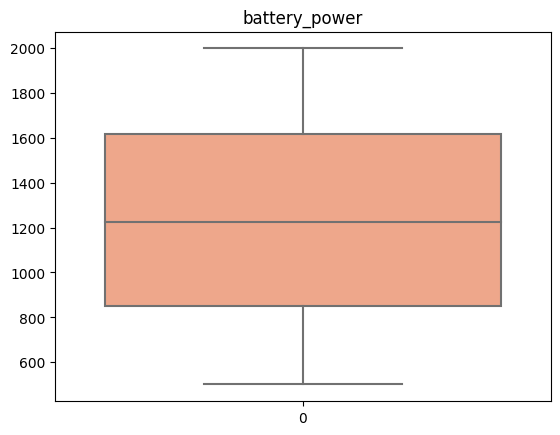

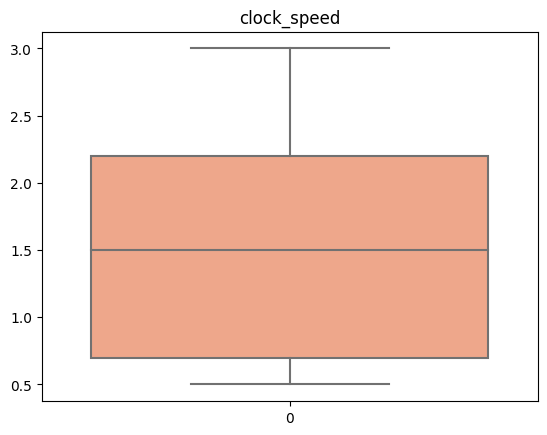

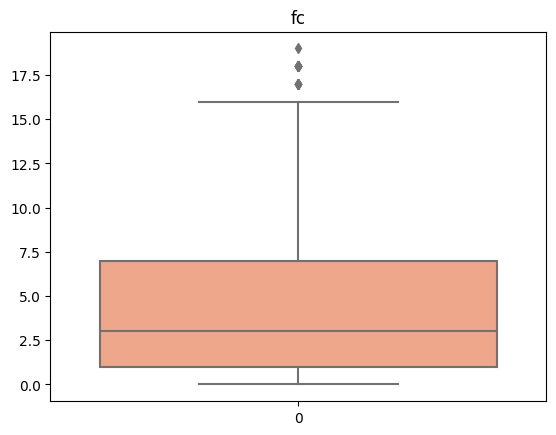

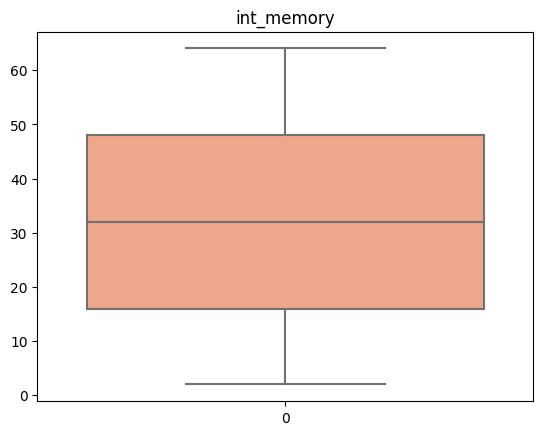

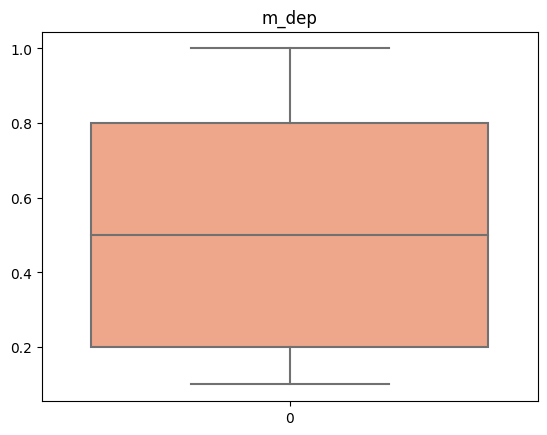

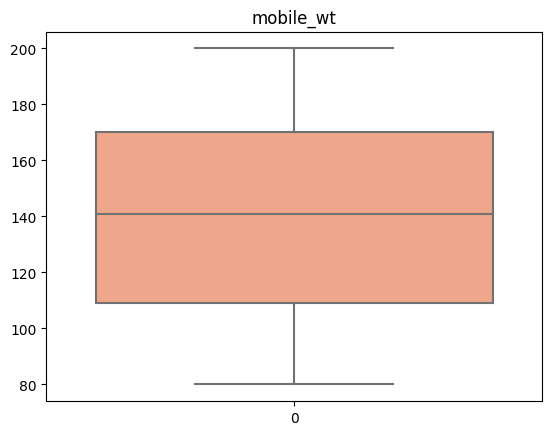

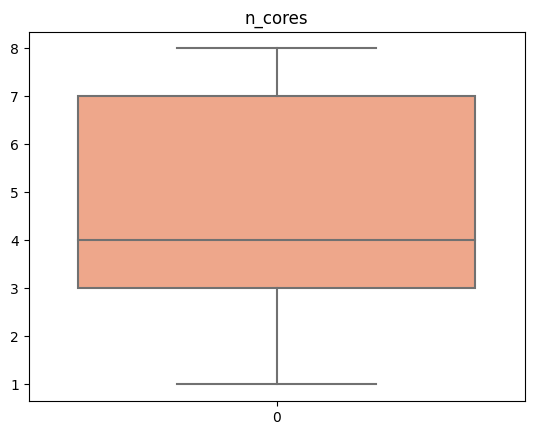

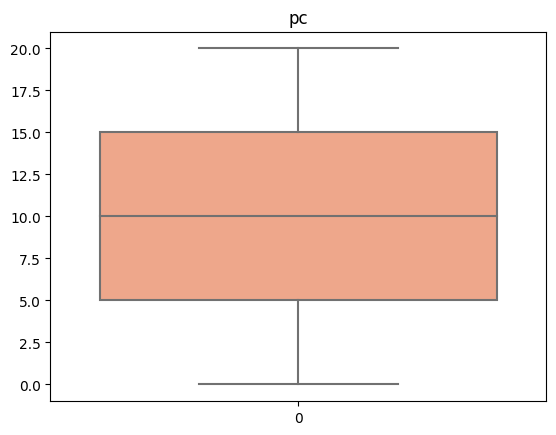

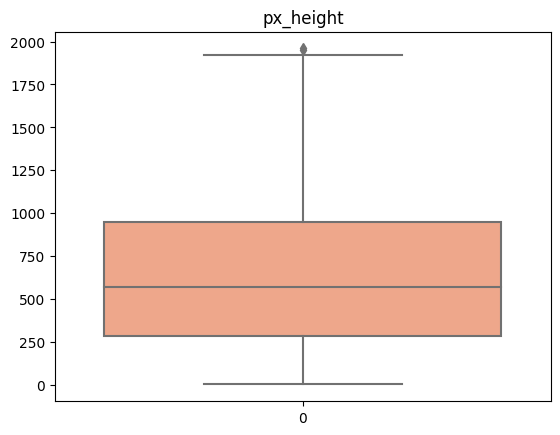

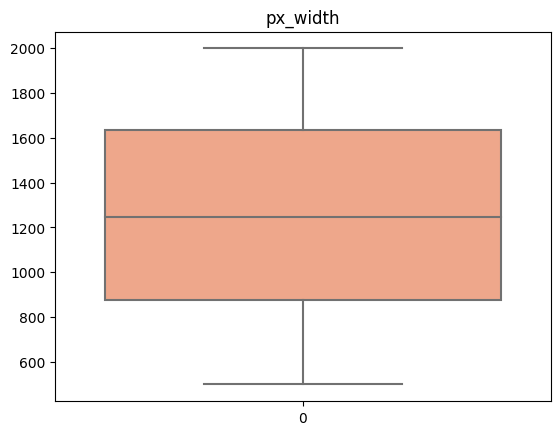

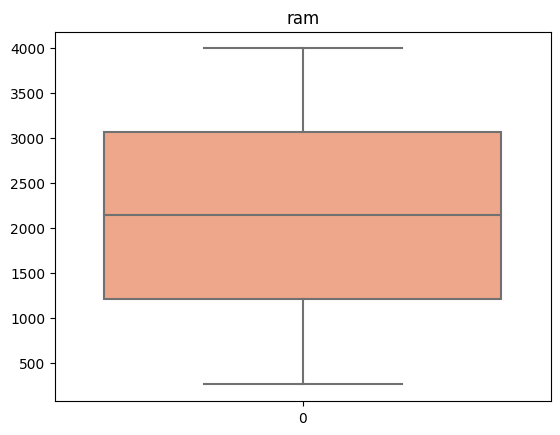

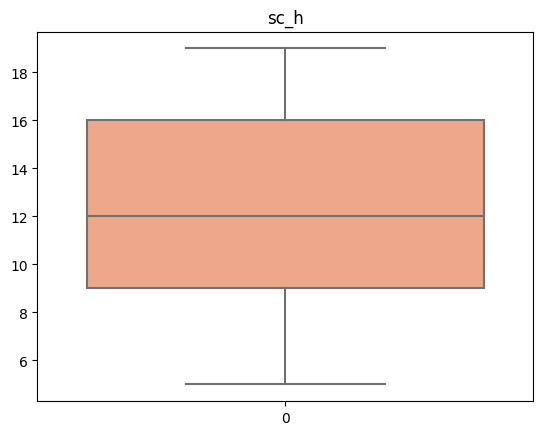

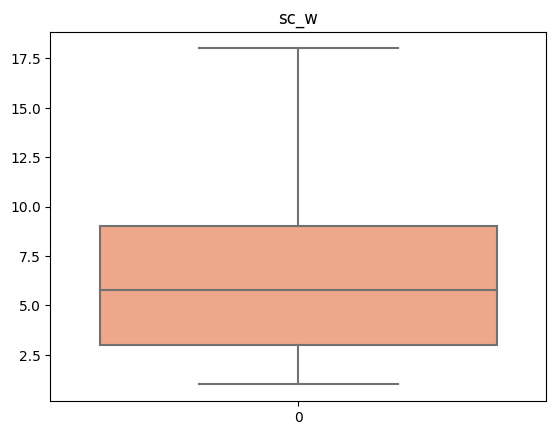

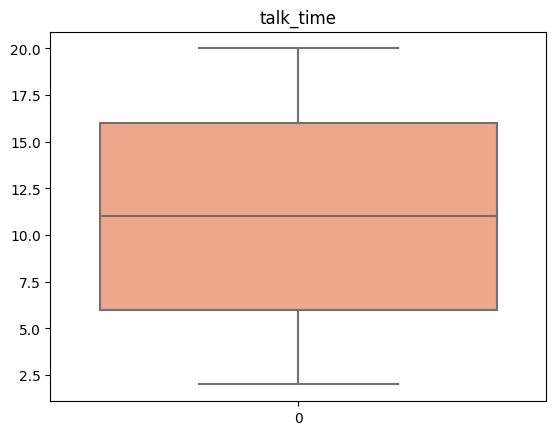

In [32]:
# Chart - 7 visualization code 
# dealing with outliers values
for i in data_num.columns:
    sns.boxplot(data_num[i],color='#FFA07A')
    plt.title(i)
    plt.show()

##### 1. Why did you pick the specific chart?

Answer :- Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

Thus, for each numerical varibale in the given dataset, we used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.

##### 2. What is/are the insight(s) found from the chart?

Answer :- Almost all columns are symmetric distributed and mean is nearly same with median for numerical columns. Here Area code will be treated as text values as there are only 3 values in the particular column.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

answer :- box plot cannot define business impact. It's done just to see the distribution of the column data over the dataset.

#### Chart2

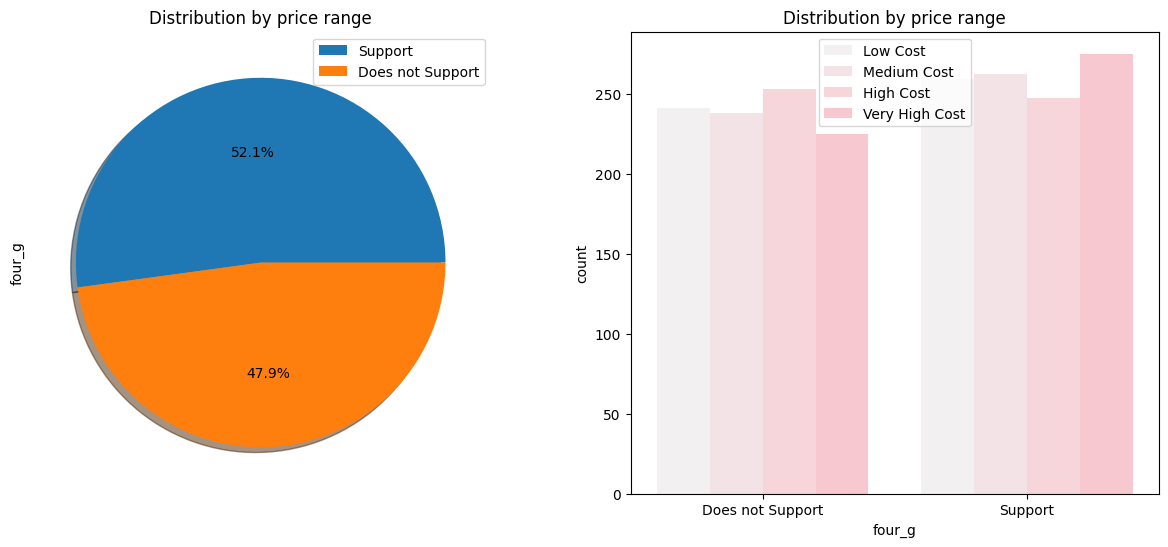

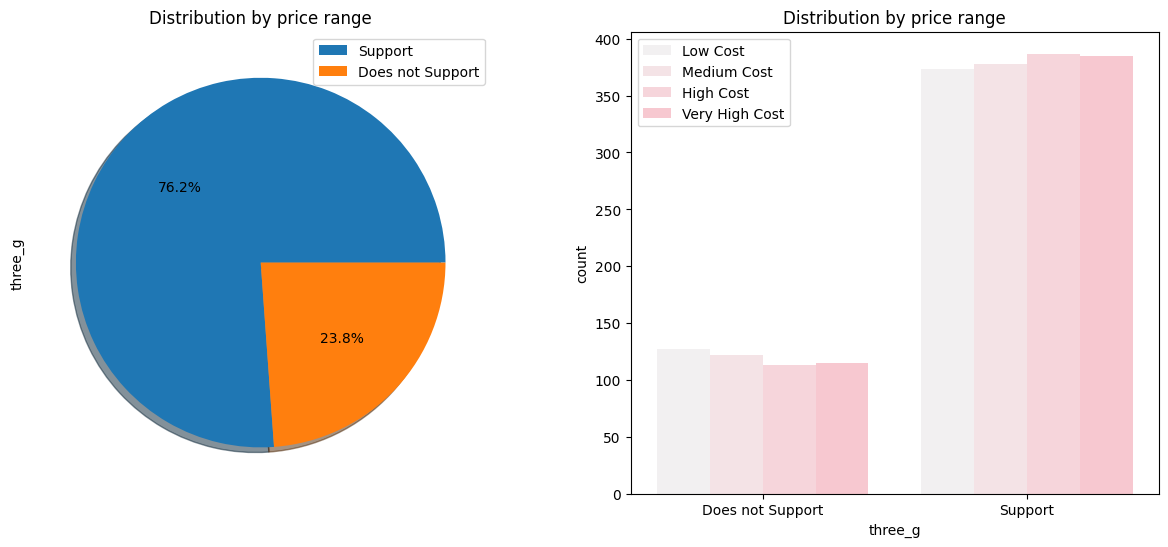

In [33]:
# Chart - 8 visualization code
binary_features = [ 'four_g', 'three_g']

# Plot of binary features against price range

for col in binary_features:
  fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 6))

  df1[col].value_counts().plot.pie (autopct='%1.1f%%', ax = ax1, shadow=True, labeldistance=None)
  ax1.set_title('Distribution by price range')
  ax1.legend(['Support', 'Does not Support'])
  sns.countplot(x = col, hue = 'price_range', data = df1, ax = ax2, color = 'pink')
  ax2.set_title('Distribution by price range')
  ax2.set_xlabel(col)
  ax2.legend(['Low Cost', 'Medium Cost', 'High Cost', 'Very High Cost'])
  ax2.set_xticklabels(['Does not Support', 'Support'])

##### 1. Why did you pick the specific chart?

1.   List item
2.   List item

Answer :- Pie chart is a type of graph in which a circle is divided into sectors that each represents a proportion of the whole. Pie charts are a useful way to organize data in order to see the size of components relative to four_g and three_g variable.

Thus, we have used pie chart to show the percentage of having which one support and which one not support.

The bar graph is used to compare the items between different groups of price range. Bar graphs are used to measure the 4 variable counting the which mobile support and which mobile are not support.

##### 2. What is/are the insight(s) found from the chart?

Answer :- ++++++++++++++++++++++++++++++++++++++++++

three_g

1.support=76.2%

2.dosenot support=23.8

++++++++++++++++++++++++++++++++++++++++++

four_g

1.support=52.1%

2.doesnot support=47.9%

+++++++++++++++++++++++++++++++++++++++++

#### Chart - 3

<Axes: xlabel='price_range', ylabel='battery_power'>

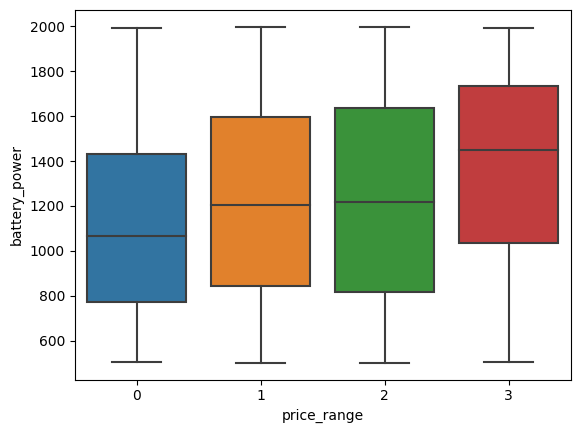

In [34]:
# Chart - 9 visualization code
#Battery_power vs price_range


sns.boxplot(x="price_range", y="battery_power", data=df1)

##### 1. Why did you pick the specific chart?

Answer :- Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.

##### 2. What is/are the insight(s) found from the chart?

Answer :- There is not a continuous increase in battery_power as we move from Low cost to Very high cost. Mobiles with 'Medium cost' and 'High cost' has almost equal battery_power. so we can say that it would be a driving factor in deciding price_range.

#### Chart 4

Text(0, 0.5, 'no. of phones')

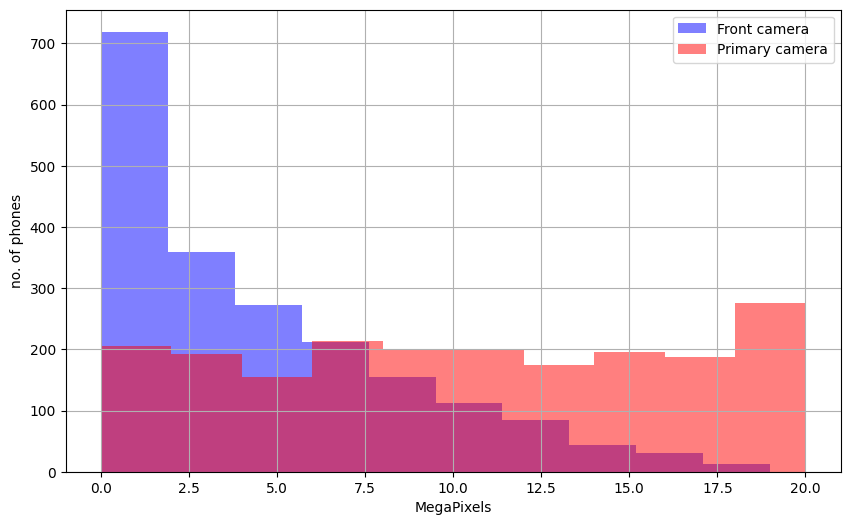

In [35]:
# Chart - 10 visualization code
plt.figure(figsize=(10,6))
df1['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df1['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')
plt.ylabel('no. of phones')

##### 1. Why did you pick the specific chart?

Answer :- It is often used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

##### 2. What is/are the insight(s) found from the chart?

Answer :- there is continuous decrease in no. of phones as we move from Low megapixels to high megapixels. on the other hand primary megapixels has almost equal megapixels with decrease in no. of phones.

#### Chart 5

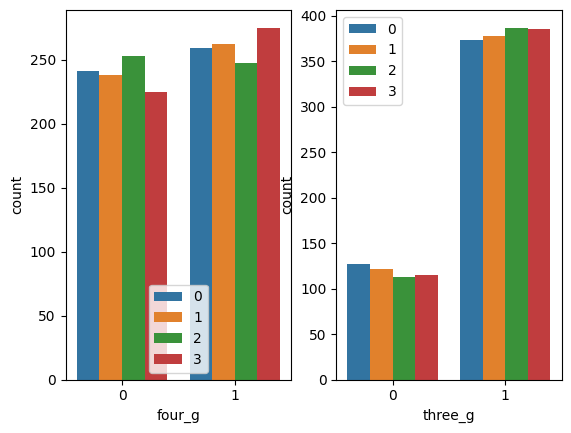

In [36]:
# Chart - 11 visualization code
plt.figure(1)
plt.subplot(121)
sns.countplot(x = 'four_g',hue= 'price_range',data  = df1)
plt.legend()
plt.subplot(122)
sns.countplot(x = 'three_g',hue= 'price_range',data  = df1)
plt.legend()
     

##### 1. Why did you pick the specific chart?

Answer :- Countplot is used to show the counts of observation in each categorical variable such as four_g and three_g category using bars.

##### 2. What is/are the insight(s) found from the chart?

Answer :- there is two categorical variable four_g and three_g, were countplot are used to show the number of counts of observation of this two category.such as four_g phones are almost equal in price range were as three_g phones have very big differences in price range. 

#### Chart - 6 - Correlation Heatmap :-

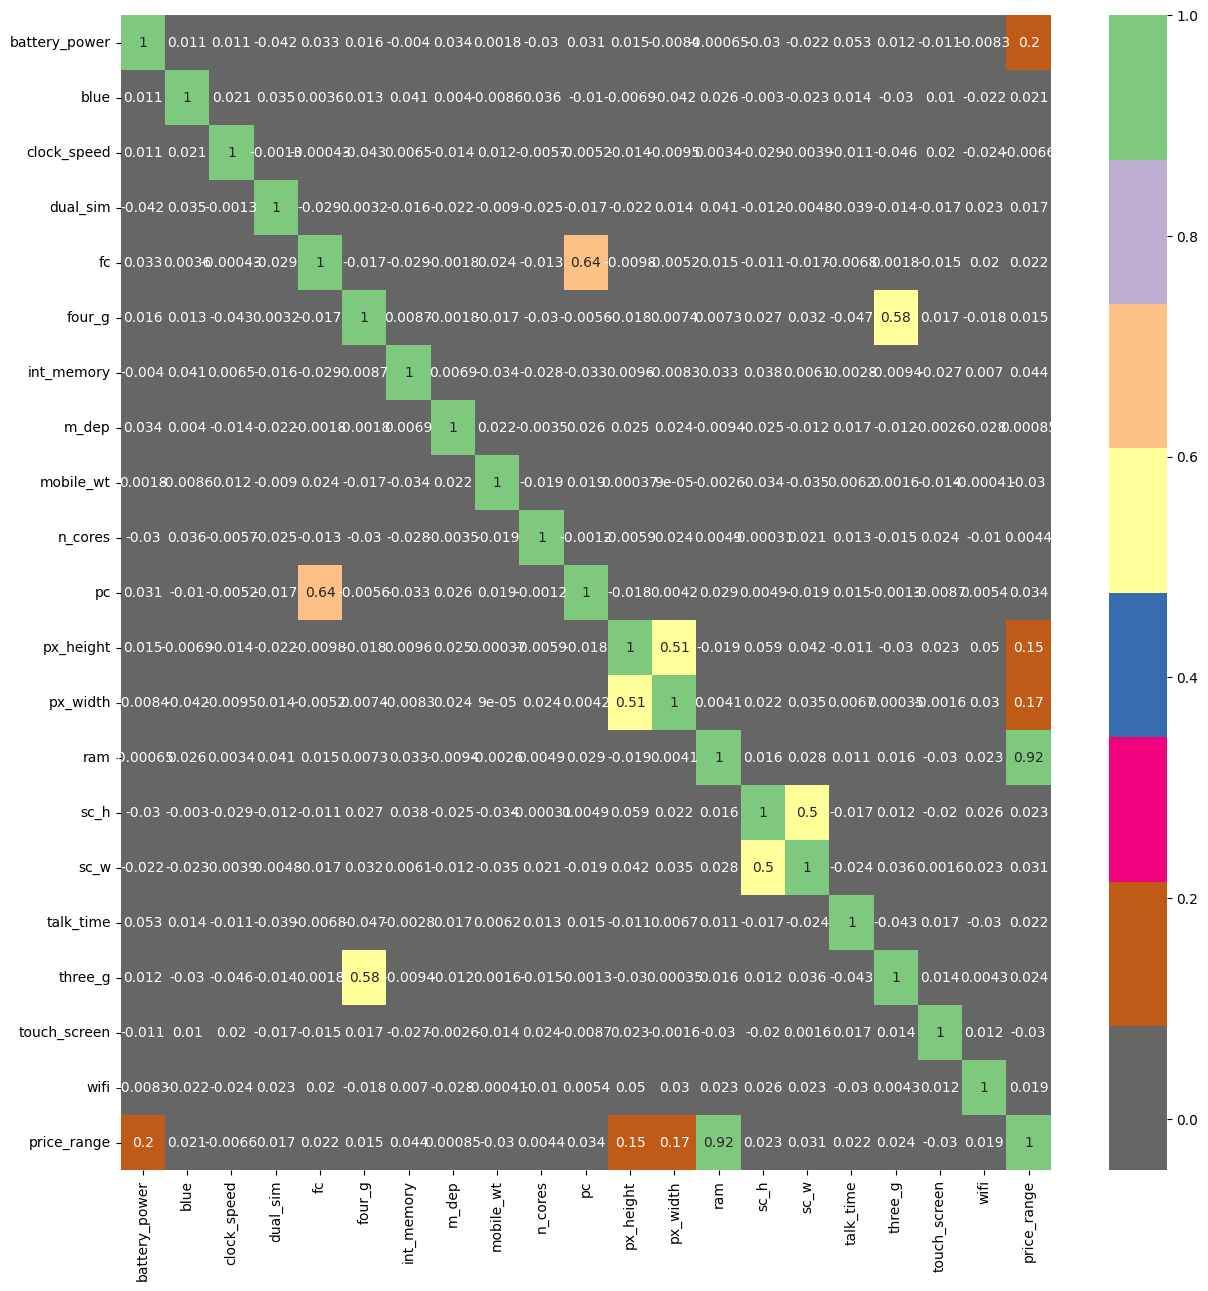

In [37]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),annot=True,cmap=plt.cm.Accent_r)
plt.show()

##### 1. Why did you pick the specific chart?

Answer :- A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coefficients, we used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

Answer :- From the above correlation heatmap.

1.we can see total price range are positiveliy highly correlated with a value of 1.

2.we can see total ram are correlated with a value of 92%.

3.we can see total pc and fc are correlated with a value of 65%.

price range is positively correlated only with all features and negative correlated with rest variables.

Rest all correlation can be depicted from the above chart.

#### Chart - 7 - Pair Plot :-

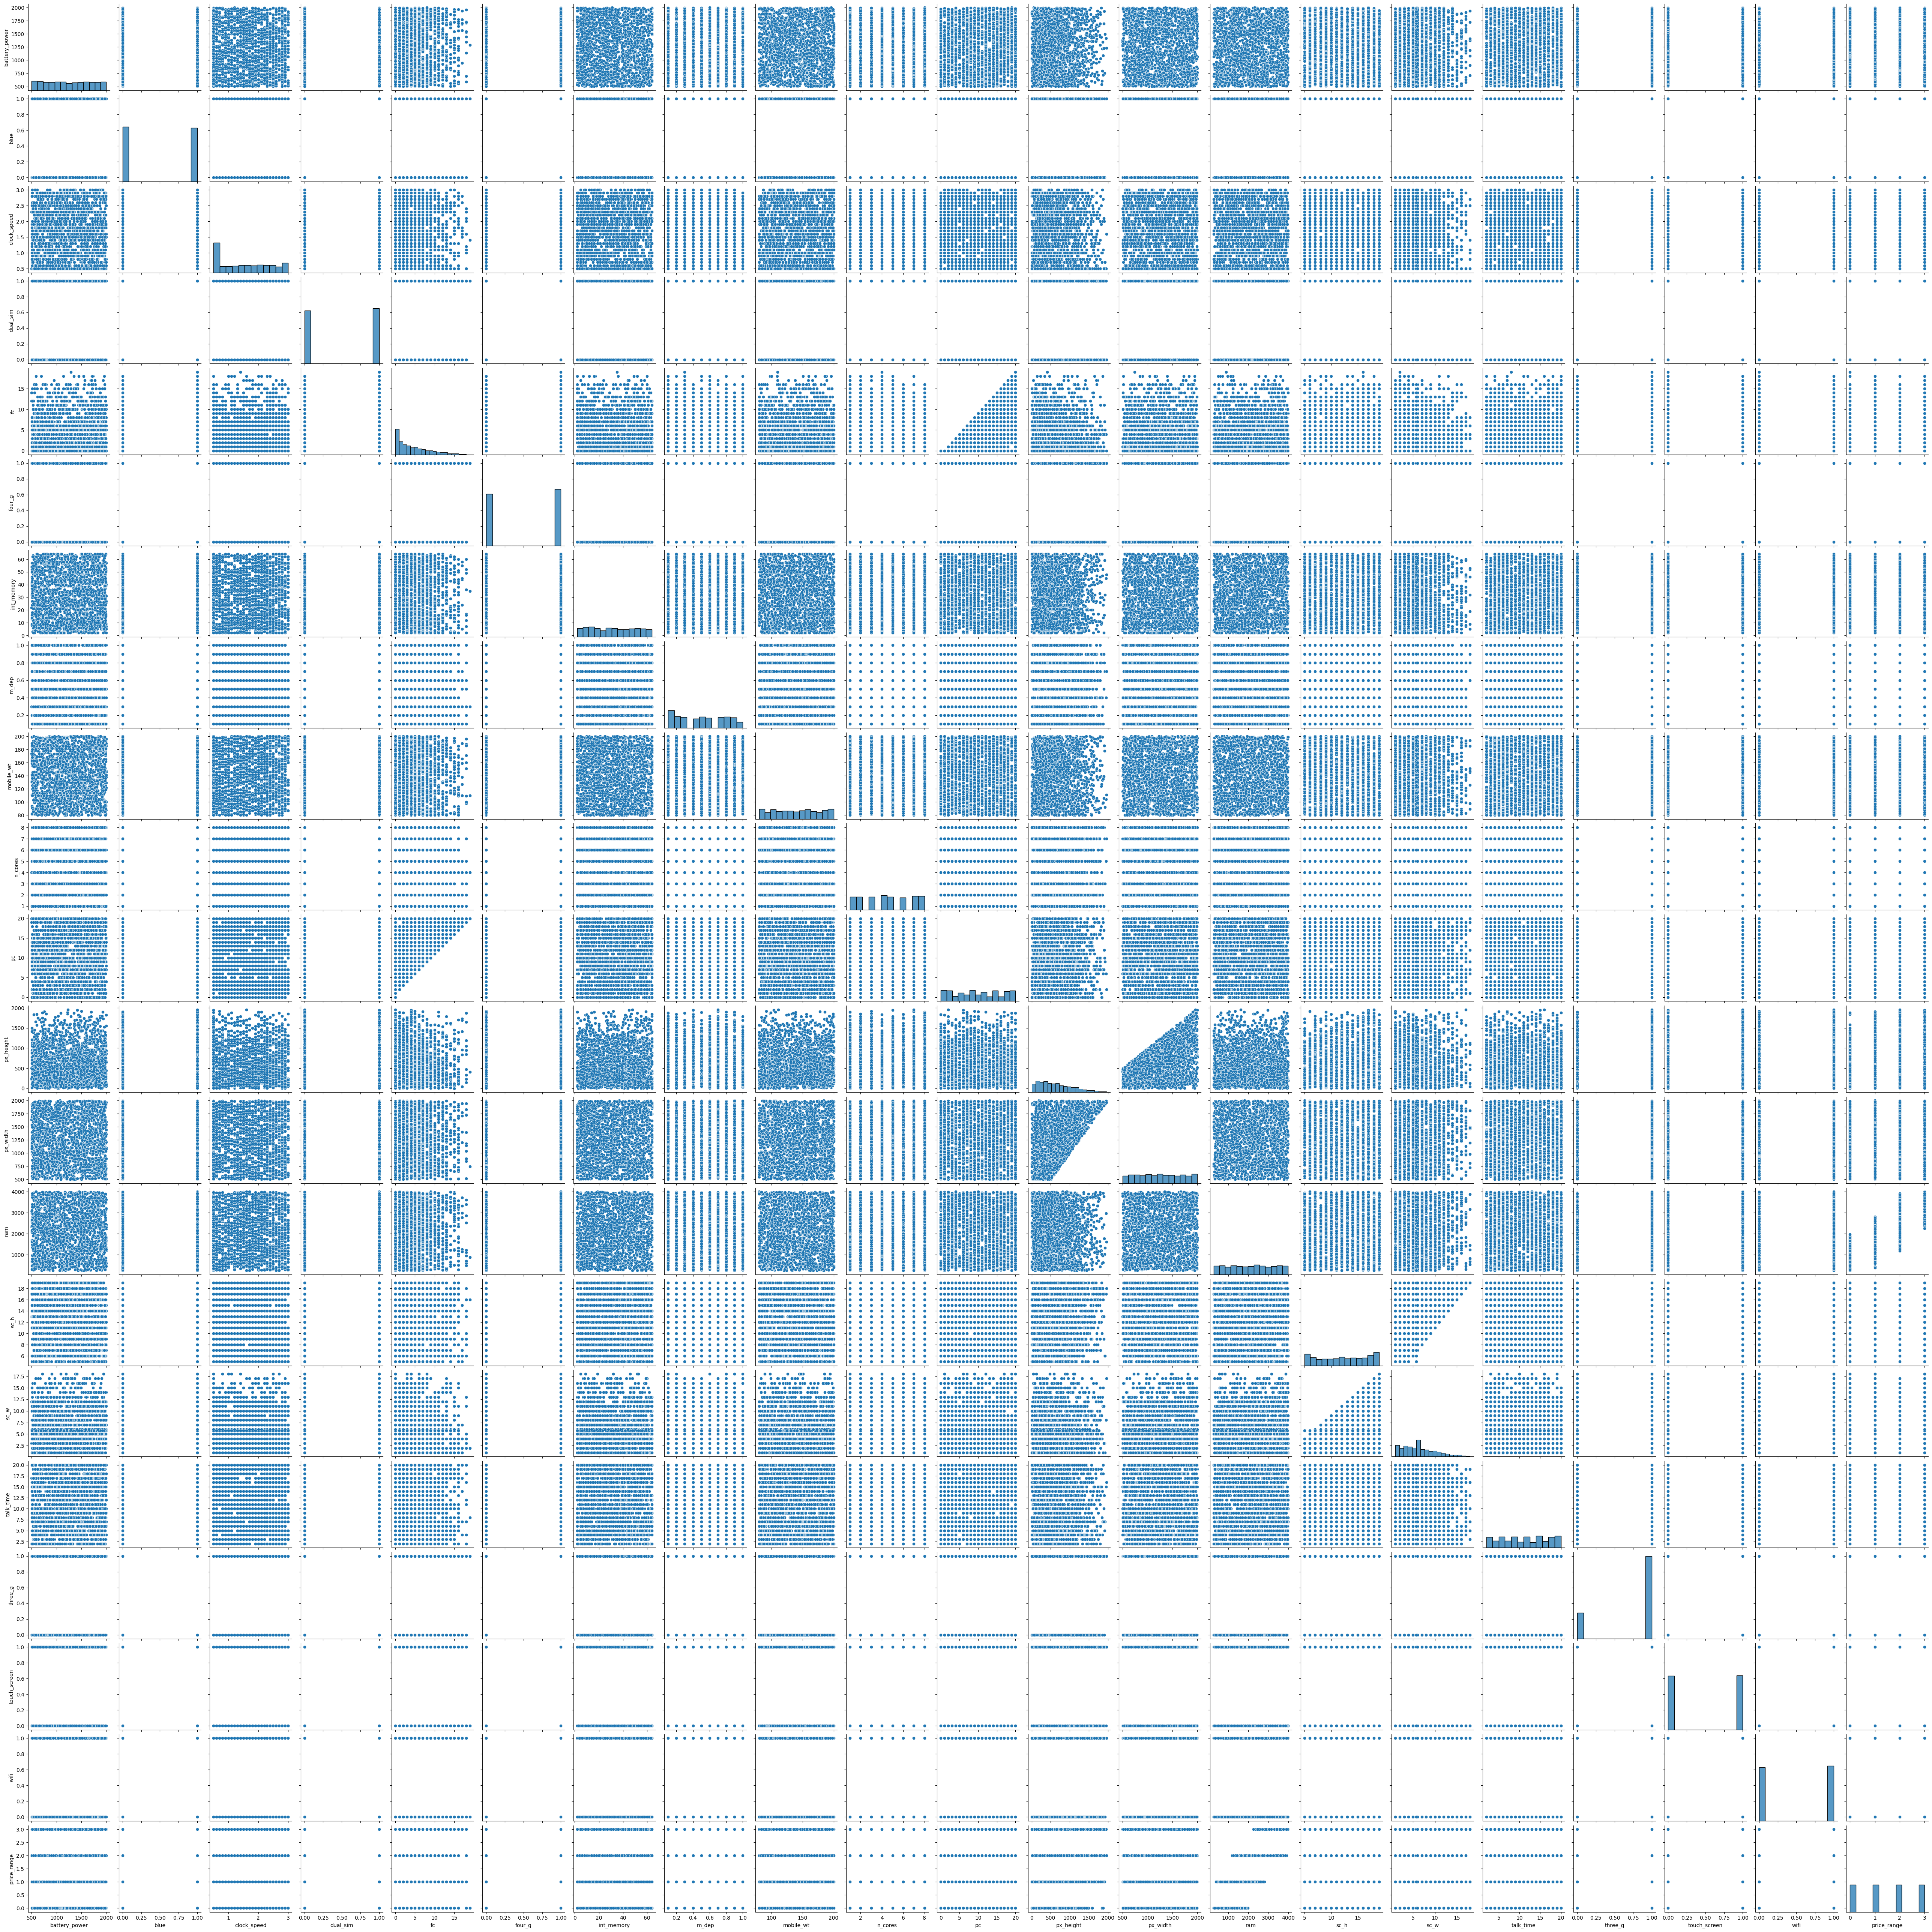

In [38]:
# Pair Plot visualization code
sns.pairplot(df1)
plt.show()
     

##### 1. Why did you pick the specific chart?

Answer :- Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

Thus, we used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

Answer :- From the above chart we got to know, there are less linear relationship between variables and data points aren't linearly separable.Mobile price range is clusetered. Some of the above features are linearly dependent on price range like ram, internal memory, processors and so on.